In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pdf of the normal distribution with mean mu and std. dev. sd                                                               
def N(x, mu, sd) :

    return 1/(sd * np.sqrt(2*np.pi)) * np.exp(-.5*((x-mu)/sd)**2)

# the scaling factor of a raw histogram vs. its (normalized) density                                                         
def scaling(c, b) :
    ss = sum(c) * np.diff(b)

    return sum(ss) / len(ss)

# get counts info for displaying                                                                                             
def counts(c) :

    d = dict(enumerate(c)) # get counts info                                                                                 
    cs = []
    for x in d :
        if d[x] :
            cs.append('{}={}'.format(x, int(d[x])))

    ds = ['counts:','']
    for i in range(10) :

        r = '~~~'.join(cs[10*i : (10*i+10)])
        if not r :
            break

        ds.append(r)

    return '\n'.join(ds)


In [2]:
xs = np.random.normal(0, 1, 1000)

Text(0, 0, 'counts:\n\n0=1~~~5=2~~~6=1~~~7=1~~~8=1~~~9=1~~~11=3~~~12=1~~~14=1~~~15=2\n16=4~~~17=4~~~18=3~~~19=6~~~20=5~~~21=5~~~22=12~~~23=13~~~24=2~~~25=12\n26=10~~~27=15~~~28=12~~~29=11~~~30=14~~~31=16~~~32=20~~~33=21~~~34=14~~~35=16\n36=25~~~37=14~~~38=17~~~39=21~~~40=18~~~41=25~~~42=27~~~43=19~~~44=23~~~45=32\n46=23~~~47=15~~~48=17~~~49=31~~~50=32~~~51=17~~~52=24~~~53=27~~~54=19~~~55=33\n56=22~~~57=20~~~58=22~~~59=14~~~60=18~~~61=16~~~62=13~~~63=12~~~64=14~~~65=19\n66=19~~~67=10~~~68=10~~~69=13~~~70=12~~~71=8~~~72=10~~~73=6~~~74=5~~~75=8\n76=7~~~77=3~~~78=3~~~79=4~~~80=5~~~81=1~~~82=1~~~83=2~~~84=1~~~85=3\n86=3~~~87=2~~~88=1~~~90=1~~~93=1~~~95=1~~~96=1~~~100=1')

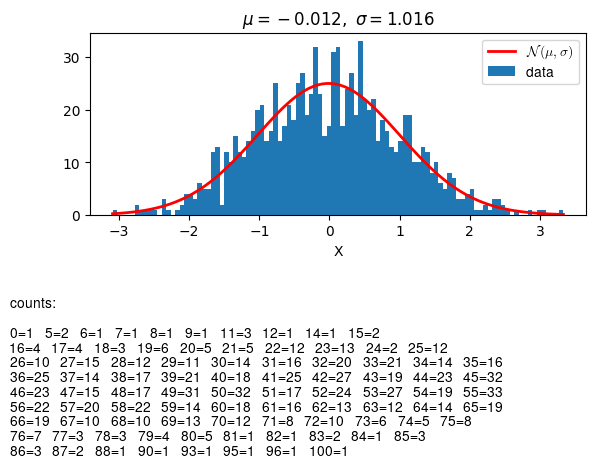

In [3]:
mu = np.mean(xs)
sd = np.std(xs, ddof=1)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.5)

c, b, _ = plt.hist(xs, 101) # data                                                                                           
s = scaling(c, b)
plt.plot(b, s * N(b,mu,sd), linewidth=2, color='r') # N(mu, sd)                                                              

plt.rcParams.update({'text.usetex':True, 'font.family':'Helvetica'})
title = r'$\mu = {:.3f}, ~ \sigma = {:.3f}$'.format(mu, sd)
ax.set(title = title, xlabel = 'X')
ax.legend([r'$\mathcal{N}(\mu, \sigma)$', 'data'])

cs = counts(c) # counts info                                                                                                 
plt.figtext(0,0,cs)